In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import least_squares as ls   # local file !!

In [3]:
# generate x and Y values for y=2x+5+E
l = 26
x0 = np.array([1 for _ in range(l)])
x1 = np.array([x/5 for x in range(l)]) # from 0 to 5, step 0.2
X = np.array([[x0[i], x1[i]] for i in range(len(x1))]).T
Y = np.array([-2*x+11+random.random()-1 for x in x1])

print(X)
print(Y)

[[ 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1. ]
 [ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6
   2.8  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5. ]]
[ 10.42449647  10.09405175   9.36846022   9.13341531   9.13461068
   8.93895633   8.39152433   7.96009906   7.42799483   6.44439759
   6.34993058   6.06570453   6.09955158   4.80281384   5.05632671
   4.87126373   4.04464176   3.46534165   3.75196473   2.92380245
   2.69905973   2.38011197   1.61621972   1.15249981   0.73443586
   0.7044442 ]


In [4]:
X, multiplier = ls.normalize(X)
print(X)
B = ls.solve(X, Y)

[[ 1.    0.  ]
 [ 1.    0.04]
 [ 1.    0.08]
 [ 1.    0.12]
 [ 1.    0.16]
 [ 1.    0.2 ]
 [ 1.    0.24]
 [ 1.    0.28]
 [ 1.    0.32]
 [ 1.    0.36]
 [ 1.    0.4 ]
 [ 1.    0.44]
 [ 1.    0.48]
 [ 1.    0.52]
 [ 1.    0.56]
 [ 1.    0.6 ]
 [ 1.    0.64]
 [ 1.    0.68]
 [ 1.    0.72]
 [ 1.    0.76]
 [ 1.    0.8 ]
 [ 1.    0.84]
 [ 1.    0.88]
 [ 1.    0.92]
 [ 1.    0.96]
 [ 1.    1.  ]]


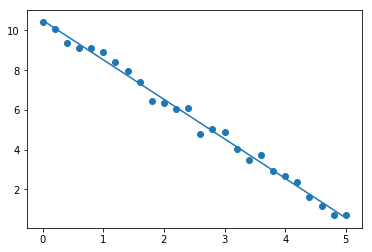

In [5]:
ls.show(X*multiplier,Y,B/multiplier)

In [6]:
features, titles = ls.open_csv("car_price/data.csv", delimiter=';')
print(titles)
for line in features[:5]:
    print(line)

['\ufeffГодвып', 'Пробег', 'Серия', 'КолвохозяевпоПТС', 'Лошадки', 'Состояние', 'квадратсерии', 'квадратвозраста', 'квадратпробега', 'Цена']
['28', '80000', '1', '3', '129', '1', '1', '784', '6400000000', '12000']
['23', '45000', '2', '2', '192', '3', '4', '529', '2025000000', '16000']
['32', '150000', '2', '3', '125', '1', '4', '1024', '22500000000', '20000']
['31', '100000', '2', '1', '125', '3', '4', '961', '10000000000', '20000']
['25', '300000', '3', '3', '188', '1', '9', '625', '90000000000', '24900']


In [7]:
Y = [float(x[-1]) for x in features]
print(Y[:10])

[12000.0, 16000.0, 20000.0, 20000.0, 24900.0, 30000.0, 31000.0, 35000.0, 40000.0, 40000.0]


In [43]:
X = [[1.] + [float(k) for k in x[:5]] + [float(x[7])] for x in features]
print(X[:5])

[[1.0, 28.0, 80000.0, 1.0, 3.0, 129.0, 784.0], [1.0, 23.0, 45000.0, 2.0, 2.0, 192.0, 529.0], [1.0, 32.0, 150000.0, 2.0, 3.0, 125.0, 1024.0], [1.0, 31.0, 100000.0, 2.0, 1.0, 125.0, 961.0], [1.0, 25.0, 300000.0, 3.0, 3.0, 188.0, 625.0]]


[[ 1.          0.875       0.14466546 ...,  1.          0.28988764
   0.765625  ]
 [ 1.          0.71875     0.08137432 ...,  0.66666667  0.43146067
   0.51660156]
 [ 1.          1.          0.27124774 ...,  1.          0.28089888  1.        ]
 ..., 
 [ 1.          0.15625     0.08499096 ...,  0.66666667  0.48988764
   0.02441406]
 [ 1.          0.15625     0.07414105 ...,  0.33333333  0.61123596
   0.02441406]
 [ 1.          0.09375     0.09041591 ...,  0.33333333  0.48988764
   0.00878906]]
[  997367.43738184 -2449627.35128443   -28136.88891905    89735.64629645
    -3473.94723861   257974.73622075  1469208.98348416]


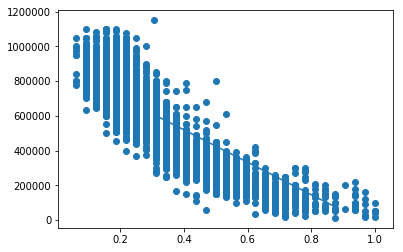

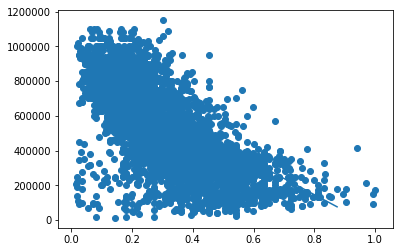

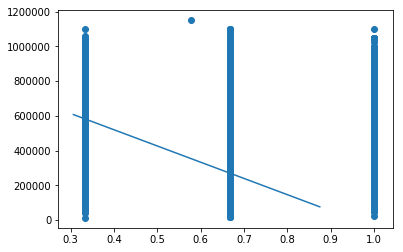

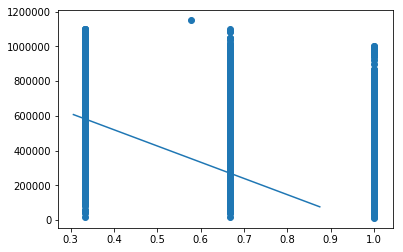

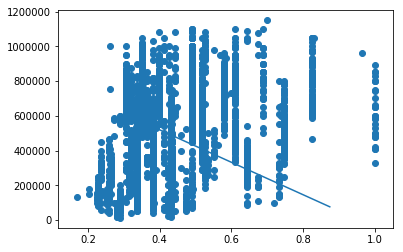

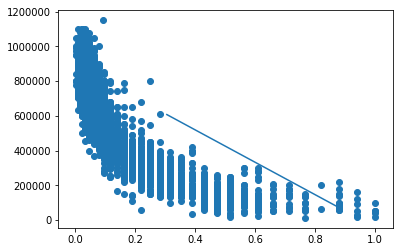

In [46]:
X = np.transpose(X)
X, multiplier = ls.normalize(X)
print(X)
B = ls.solve(X, Y)
print(B)
X[-1] = [np.sqrt(x) for x in X[-1]]
ls.show(X*multiplier,Y,B/multiplier, dims = [1,2,3,4,5,6])

In [47]:
import pandas as pd

In [48]:
data = pd.read_csv("car_price/data.csv", delimiter=';')
print(data[:10])

   Годвып  Пробег  Серия  КолвохозяевпоПТС  Лошадки  Состояние  квадратсерии  \
0      28   80000      1                 3      129          1             1   
1      23   45000      2                 2      192          3             4   
2      32  150000      2                 3      125          1             4   
3      31  100000      2                 1      125          3             4   
4      25  300000      3                 3      188          1             9   
5      31  300000      2                 3      125          1             4   
6      23  218000      2                 3      129          2             4   
7      20  123000      2                 3      192          1             4   
8      22  300000      2                 1      143          1             4   
9      23  266000      1                 3      115          2             1   

   квадратвозраста  квадратпробега   Цена  
0              784      6400000000  12000  
1              529      2025000

In [49]:
for feature in data:
    data.feature = pd.to_numeric(data[feature], errors='coerce')

In [50]:
for i, line in enumerate(data.values):
    try:
        int(line[0])
    except:
        print(i)

In [51]:
def plot_errors(X, Y, B):
    Y_pred = np.dot(X, B)
    E = Y-Y_pred
    plt.figure()
    plt.scatter(x = Y, y=E)
    plt.show()
    return E

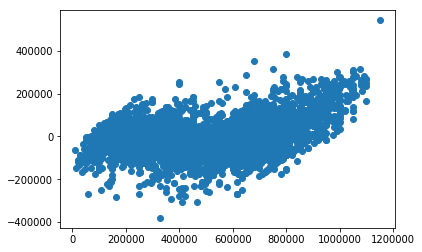

74.879144423012619

In [52]:
np.mean(plot_errors(X*multiplier, Y, B/multiplier))

In [57]:
def dispersion(X, Y, B):
    Y_pred = np.dot(X, B)
    E = (Y-Y_pred)**2
    root = np.sqrt(E)
    mean =np.mean(root)
    return mean

In [58]:
print(dispersion(X,Y,B))

66502.649159
